In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set(rc={'figure.figsize':(16,10)})
plt.style.use('seaborn-whitegrid')

In [38]:
year = '11'
model = 'model_old'

In [39]:
data = pd.read_csv(f'../outputs/{year}/out{year}.csv', index_col='Unnamed: 0')
triggers = pd.read_csv(f'../outputs/{year}/triggers{year}.csv', index_col='label')
reg_eff = pd.read_csv(f'../outputs/{model}/out{model}.csv', index_col='Unnamed: 0')

In [40]:
data

,Nsig,dNsig,lum,dEmin,dEmax,Emean
525.0,794.54,29.35,469.34,0.00,0.00,523.58
537.5,885.59,30.53,554.23,0.00,0.00,537.41
550.0,380.08,20.29,493.50,0.00,0.00,548.44
562.5,387.03,20.50,549.09,0.00,0.00,562.13
575.0,149.70,14.12,493.71,0.00,0.00,575.31
587.5,174.70,14.29,522.72,0.00,0.00,587.05
600.0,97.03,10.15,557.45,0.00,0.00,598.04
612.5,119.45,11.68,536.38,0.00,0.00,611.71
625.0,41.71,6.96,411.01,0.00,0.00,622.47
637.5,72.19,9.04,458.16,0.00,0.00,636.39


Triggers

In [41]:
triggers.tail()

,TF,CF,TC,eTF,eCF,TrigEff,vTF,vCF,TrigErr
label,,,,,,,,,
850.0,7.0,0.0,18.0,0.95,0.70,0.99,0.05,0.09,0.01
862.5,14.0,0.0,12.0,0.93,0.46,0.96,0.07,0.09,0.04
880.0,12.0,0.0,9.0,0.91,0.43,0.95,0.08,0.10,0.05
910.0,10.0,1.0,11.0,0.86,0.52,0.93,0.09,0.10,0.05
950.0,14.0,1.0,10.0,0.85,0.42,0.91,0.10,0.10,0.06


In [42]:
reg_eff.head()

,Nsig,dNsig,index,lum_err,lum,dEmin,dEmax,Emean
550.0,1590.29,41.28,1,84.63,7163,0.0,0.0,550.0
562.5,1353.86,38.47,2,79.41,6306,0.0,0.0,562.5
575.0,1196.61,36.00,3,74.27,5516,0.0,0.0,575.0
587.5,1103.46,34.54,4,71.53,5116,0.0,0.0,587.5
600.0,960.04,32.57,5,67.87,4606,0.0,0.0,600.0


Get N/L

In [43]:
data['CSvis'] = data['Nsig']/data['lum']
data['dCSvis'] = data['dNsig']/data['lum']

Trigger join

In [44]:
data = data.join(triggers[['TrigEff', 'TrigErr']], how='left')

In [45]:
data = data.drop(['Nsig', 'dNsig', 'lum'], axis=1)

Get Reg_eff

In [46]:
reg_eff['RegEff'] = reg_eff['Nsig']/reg_eff['lum']
reg_eff['RegErr'] = reg_eff['dNsig']/reg_eff['lum']
reg_eff.drop(['dEmax', 'dEmin', 'lum', 'Nsig', 'dNsig'], axis=1, inplace=True)

Reg eff join

In [47]:
data['RegEff'] = data.apply(lambda x: np.interp(x['Emean'], reg_eff.Emean, reg_eff.RegEff), axis=1)
data['RegErr'] = data.apply(lambda x: np.interp(x['Emean'], reg_eff.Emean, reg_eff.RegErr), axis=1)

Recalc cross section

In [48]:
data['CS'] = data['CSvis']/data['TrigEff']/data['RegEff'];
data['dCS'] = data['CS']*np.sqrt( np.square( data['dCSvis']/data['CSvis'] ) + 
                                np.square( data['TrigErr']/data['TrigEff'] ) + 
                                np.square( data['RegErr']/data['RegEff'] ))

In [49]:
data.drop(['CSvis', 'dCSvis', 'TrigEff', 'TrigErr', 'RegEff', 'RegErr'], axis=1, inplace=True)

In [50]:
data.to_csv(f'../outputs/{year}/result_new.csv')

## Draw cross sections

In [51]:
cs11 = pd.read_csv('../outputs/11/result_new.csv', index_col=['Unnamed: 0'])
cs12 = pd.read_csv('../outputs/12/result_new.csv', index_col=['Unnamed: 0'])
cs17 = pd.read_csv('../outputs/17/result_new.csv', index_col=['Unnamed: 0'])
cs19 = pd.read_csv('../outputs/19/result_new.csv', index_col=['Unnamed: 0'])

In [52]:
#radcor = pd.read_csv('rad_cors.dat', delimiter='\t', names=['energy', 'radcor'], index_col=['energy'])
radcor = pd.read_csv('../outputs/radcors.dat', names=['energy', 'radcor'], index_col=['energy'])
radcor.index *= 0.5e3
radcor = radcor.sort_index()

In [53]:
cs11.tail()

,dEmin,dEmax,Emean,CS,dCS
850.0,0.00,0.00,846.43,0.372212,0.087794
862.5,0.00,0.00,861.56,0.280130,0.092108
880.0,8.15,7.89,878.97,0.132405,0.042213
910.0,14.83,13.04,911.28,0.152008,0.044248
950.0,28.82,37.90,964.41,0.057911,0.024015


In [54]:
radcor.head()

,radcor
energy,
550.0,0.771060
562.5,0.778335
575.0,0.784576
587.5,0.790510
600.0,0.796090


In [55]:
cs11['rad'] = np.interp(cs11.Emean, radcor.index, radcor.radcor)
cs12['rad'] = np.interp(cs12.Emean, radcor.index, radcor.radcor)
cs17['rad'] = np.interp(cs17.Emean, radcor.index, radcor.radcor)
cs19['rad'] = np.interp(cs19.Emean, radcor.index, radcor.radcor)

In [56]:
def born(data):
    data['born'] = data.CS/data.rad
    data['born_err'] = data.dCS/data.rad

In [57]:
born(cs11)
born(cs12)
born(cs17)
born(cs19)

In [58]:
errE = dict()
errE[11] = [cs11.dEmin*2e-3, cs11.dEmax*2e-3]
errE[12] = [cs12.dEmin*2e-3, cs12.dEmax*2e-3]
errE[17] = [cs17.dEmin*2e-3, cs17.dEmax*2e-3]
errE[19] = [cs19.dEmin*2e-3, cs19.dEmax*2e-3]

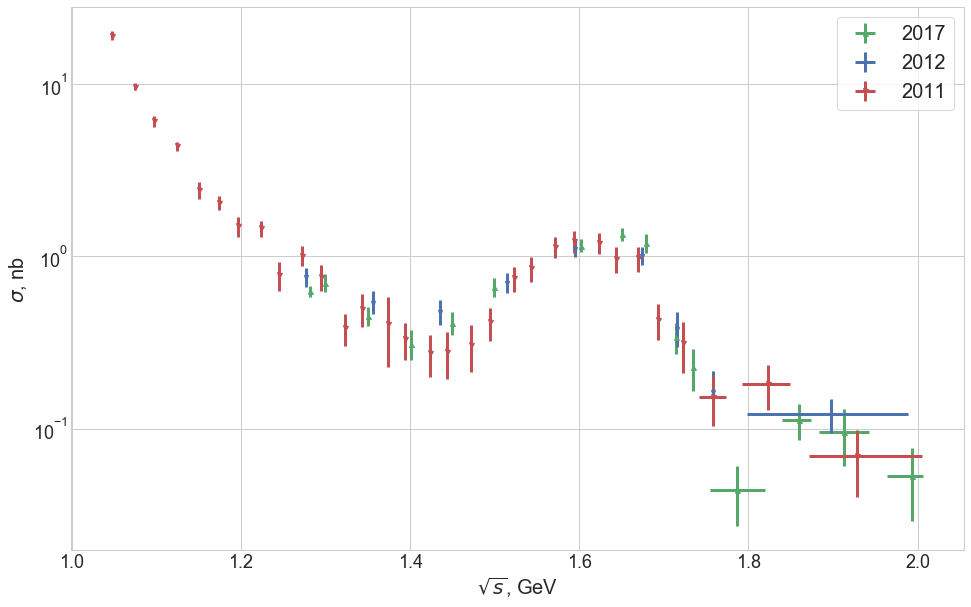

In [60]:
#plt.errorbar(cs19.Emean*2e-3, cs19.born, yerr=cs19.born_err, xerr=errE[19], fmt='kd', elinewidth=3, ms=5, label='2019')
plt.errorbar(cs17.Emean*2e-3, cs17.born, yerr=cs17.born_err, xerr=errE[17], fmt='g^', elinewidth=3, ms=5, label='2017')
plt.errorbar(cs12.Emean*2e-3, cs12.born, yerr=cs12.born_err, xerr=errE[12], fmt='bp', elinewidth=3, ms=5, label='2012')
plt.errorbar(cs11.Emean*2e-3, cs11.born, yerr=cs11.born_err, xerr=errE[11], fmt='rv', elinewidth=3, ms=5, label='2011')
plt.yscale('log')
plt.xlabel('$\sqrt{s}$, GeV', fontsize=20)
plt.ylabel('$\sigma$, nb', fontsize=20)
ax = plt.gca()
ax.tick_params(labelsize=18)
ax.legend(fontsize=20, frameon=True)
#plt.savefig('cs.pdf')